# Volcano plots from DESeq2
Using ggplot to create grid of volcano plots generated from [DESeq_geneFeatureCounts.ipynb](https://github.com/jgmcdonough/CE18_methylRAD_analysis/blob/master/analysis/DMGs_analysis/DESeq_geneFeatureCounts.ipynb)

### 0. load libraries

In [2]:
library(tidyverse)
library(ggrepel) # to add gene names to plots

library(cowplot)
library(ggvenn)

### 1. load df of combined DESeq results
results between each pairwise comparison can be found [here](https://github.com/jgmcdonough/CE18_methylRAD_analysis/tree/master/analysis/deseq_res_files/pairwise_results) 

files within that directory were combined into one file to create volcano grid, which is being loaded below (combined_geneRes.csv)

In [3]:
mega_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/combined_geneRes.csv')
mega_df <- mega_df[-1]
head(mega_df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl,phase1_moreMe,phase2_moreMe
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,LOC111109452,18.77505,-0.16226559,0.3575755,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
2,LOC111124802,217.68988,0.09050737,0.1234114,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
3,LOC111101273,79.70594,-0.11280505,0.1483744,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
4,LOC111101250,127.13666,-0.13336153,0.1830605,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
5,LOC111101262,278.66598,0.19233094,0.1201891,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
6,LOC111133260,47.32761,-0.90652990,0.1964406,-3.342129,0.0008313848,0.1602441,CC_HC,not significant,not signficiant,not significant


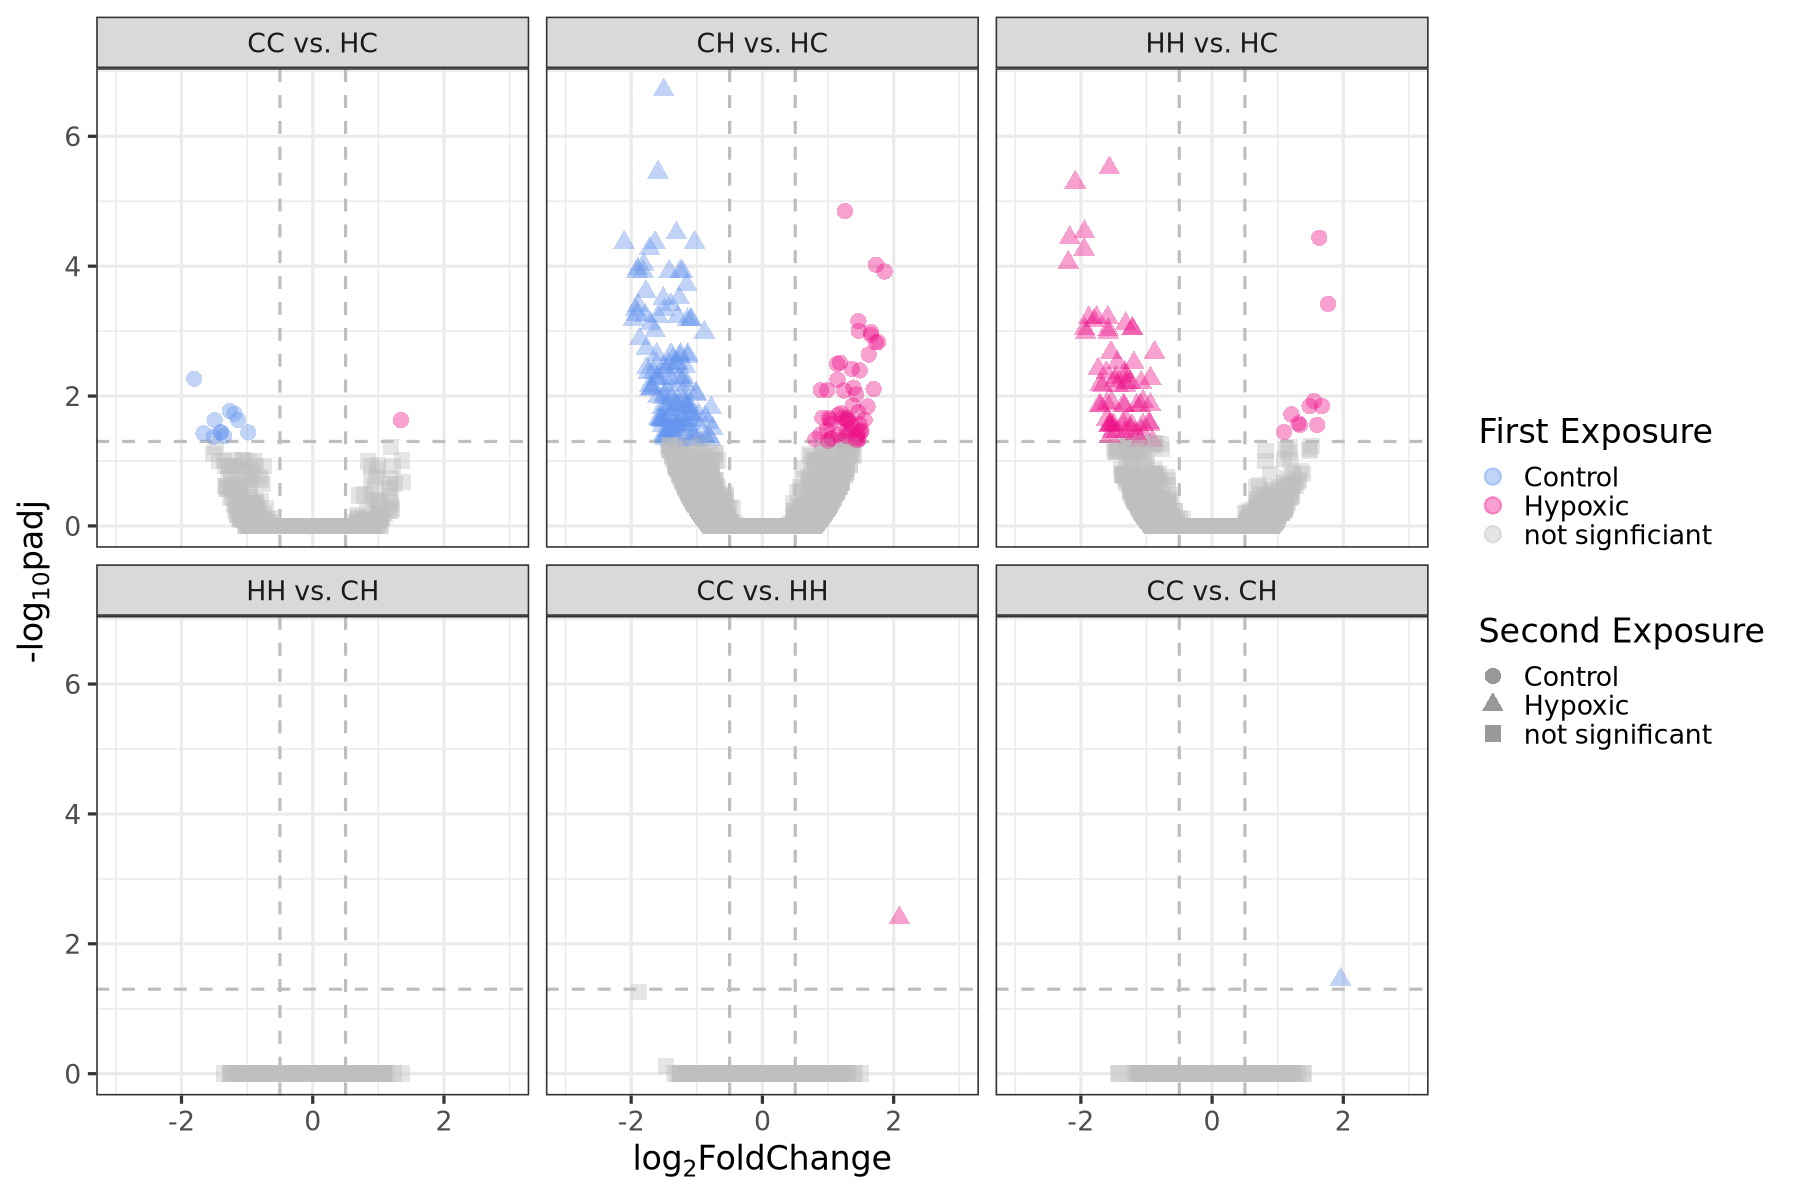

In [6]:
options(repr.plot.width=15, repr.plot.height=10)

# setting order of grids for facet_wrap
mega_df$pair <- factor(mega_df$pair, levels = c('CC_HC','CH_HC','HH_HC', 'HH_CH','HH_CC','CC_CH'))

# renaming grid labels
new_labels <- c(CC_HC = "CC vs. HC", 
                CH_HC = "CH vs. HC", 
                HH_HC = "HH vs. HC",
               HH_CH = "HH vs. CH",
               HH_CC = "CC vs. HH",
               CC_CH = "CC vs. CH")

volcano_MEGA <- ggplot(data = mega_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = phase1_moreMe,
                                          shape = phase2_moreMe)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
scale_color_manual(values=c('cornflowerblue','deeppink2', 'gray')) +
theme_bw(base_size=20) +
guides(col = guide_legend(order = 1),
          shape = guide_legend(order = 2)) +
facet_wrap(~pair, labeller = as_labeller(new_labels)) +
                        labs(col='First Exposure', 
                             shape = 'Second Exposure',
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_MEGA

In [13]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/metaVolcano1.pdf', volcano_MEGA,
      width = 15, heigh = 10)

trying to add gene names to highlight in the plot

following pipeline [here](https://erikaduan.github.io/posts/2021-01-02-volcano-plots-with-ggplot2/)

In [4]:
head(mega_df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl,phase1_moreMe,phase2_moreMe
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,LOC111109452,18.77505,-0.16226559,0.3575755,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
2,LOC111124802,217.68988,0.09050737,0.1234114,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
3,LOC111101273,79.70594,-0.11280505,0.1483744,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
4,LOC111101250,127.13666,-0.13336153,0.1830605,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
5,LOC111101262,278.66598,0.19233094,0.1201891,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
6,LOC111133260,47.32761,-0.90652990,0.1964406,-3.342129,0.0008313848,0.1602441,CC_HC,not significant,not signficiant,not significant


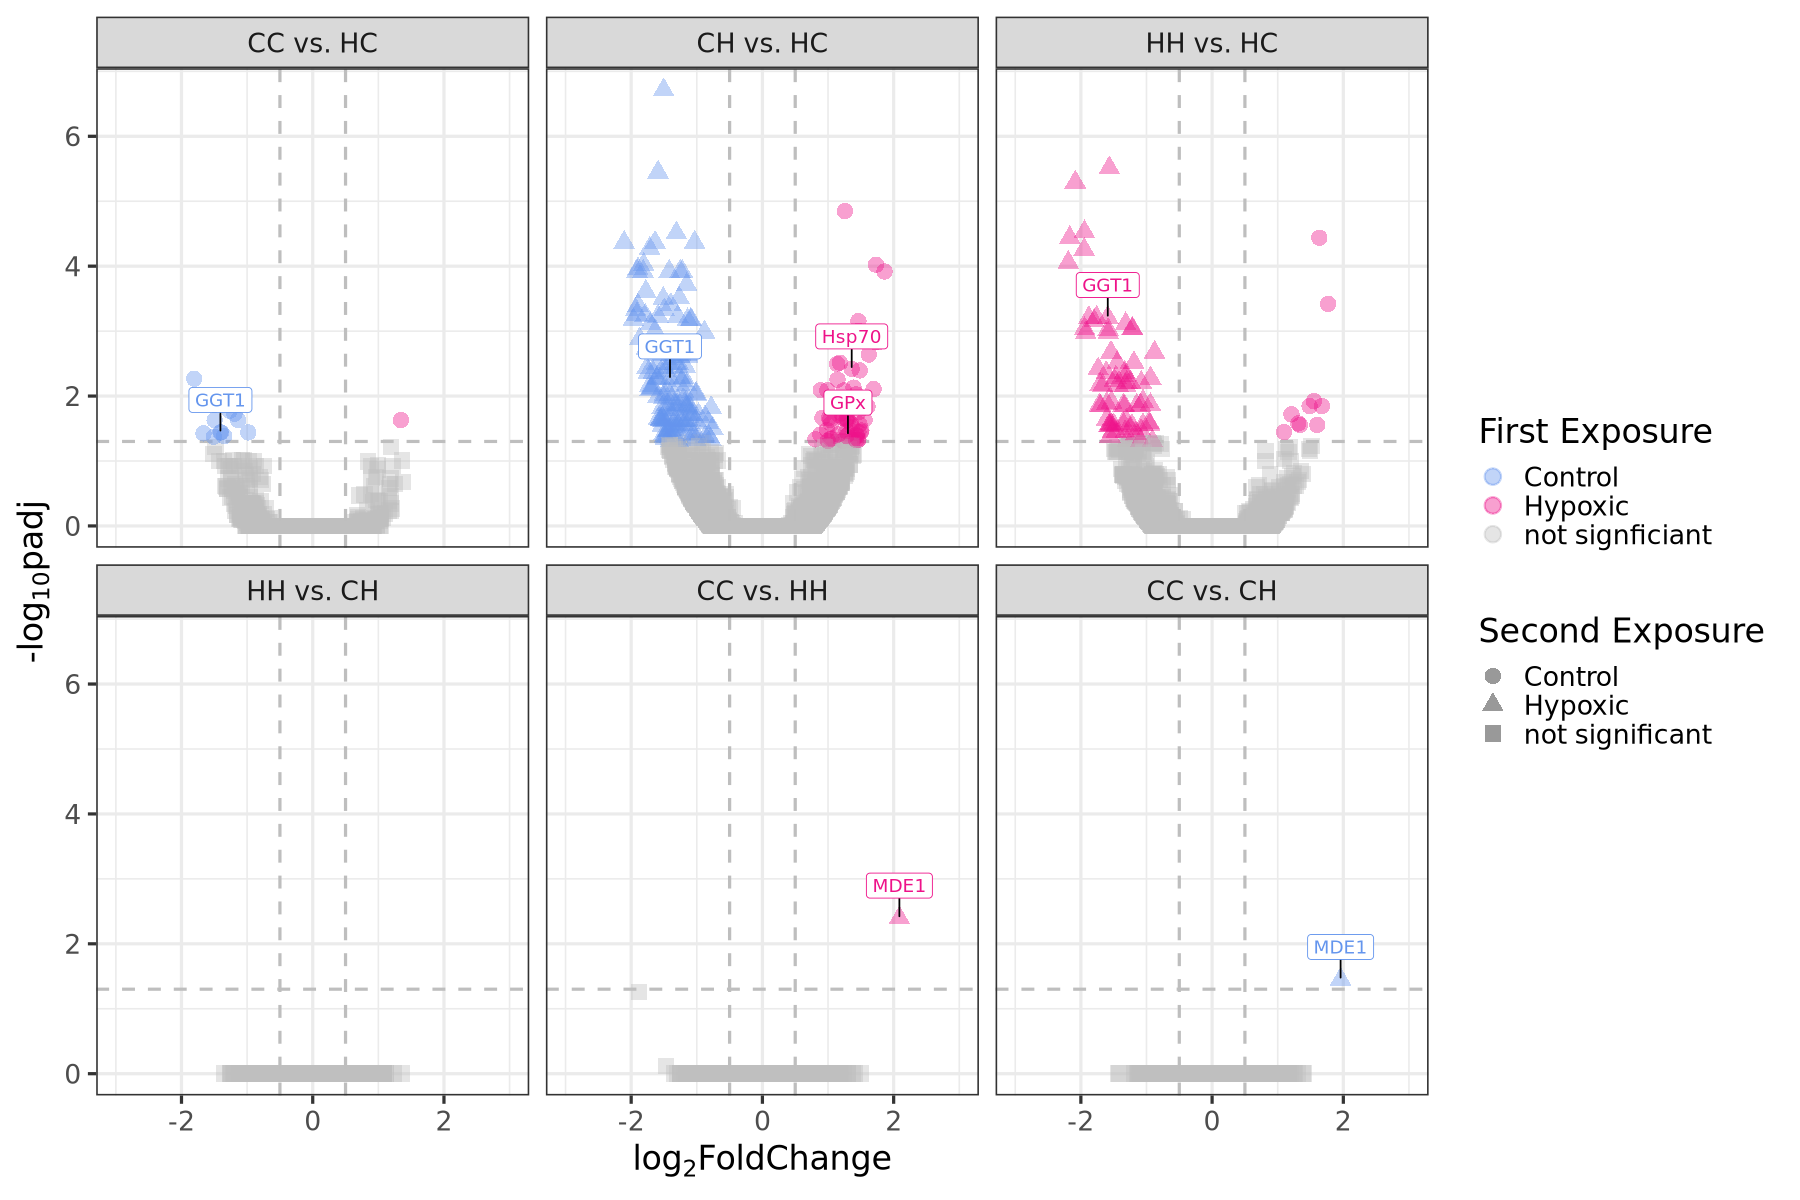

In [6]:
options(repr.plot.width=15, repr.plot.height=10)

# setting order of grids for facet_wrap
mega_df$pair <- factor(mega_df$pair, levels = c('CC_HC','CH_HC','HH_HC', 'HH_CH','HH_CC','CC_CH'))

# renaming grid labels
new_labels <- c(CC_HC = "CC vs. HC", 
                CH_HC = "CH vs. HC", 
                HH_HC = "HH vs. HC",
               HH_CH = "HH vs. CH",
               HH_CC = "CC vs. HH",
               CC_CH = "CC vs. CH")

###### choosing noteworthy genes ######
shared_bottom <- mega_df %>%
filter(X == 'LOC111100699',pair %in% c('CC_CH', 'HH_CC'))

# GPx
gpx <- mega_df %>%
filter(X == 'LOC111120666', pair %in% 'CH_HC')

# GGT1
ggt1 <- mega_df %>%
filter(X == 'LOC111124674', pair %in% c('CH_HC', 'CC_HC', 'HH_HC'))

# HSP70
hsp70 <- mega_df %>%
filter(X == 'LOC111137579', pair %in% 'CH_HC')

# FERMD8
ferm <- mega_df %>%
filter(X == 'LOC111129146', pair %in% c('CH_HC', 'CC_HC', 'HH_HC'))

# MCRI1
mapk <- mega_df %>%
filter(X == 'LOC111121129', pair %in% 'HH_HC')

# TRIM71
trim71 <- mega_df %>%
filter(X == 'LOC111110897', pair %in% 'HH_HC')

# GDH
gdh <- mega_df %>%
filter(X == 'LOC111119107', pair %in% c('CH_HC', 'HH_HC'))

# E2F3
e2f3 <- mega_df %>%
filter(X == 'LOC111119994', pair %in% 'CH_HC')

# dj-1
dj1 <- mega_df %>%
filter(X == 'LOC111101925', pair %in% 'CH_HC')


###### Creating volcano plot of all data ######

volcano_MEGA <- ggplot(data = mega_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = phase1_moreMe,
                                          shape = phase2_moreMe)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +

# pointing out noteworthy genes in the plots
geom_label_repel(data = shared_bottom,
                 aes(label = 'MDE1'),
                 force = 2,
                 nudge_y = 0.5,
                 segment.color = "black",  
                show.legend = FALSE) +
geom_label_repel(data = gpx,
                 aes(label = 'GPx'),
                 force = 4,
                 nudge_y = 0.5,
                 segment.color = "black",  
                show.legend = FALSE) + 
geom_label_repel(data = ggt1,
                 aes(label = 'GGT1'),
                 force = 2,
                 nudge_y = 0.5,
                 segment.color = "black",  
                show.legend = FALSE) + 
geom_label_repel(data = hsp70,
                 aes(label = 'Hsp70'),
                 force = 4,
                 nudge_y = .5,
                 segment.color = "black",  
                show.legend = FALSE) +  
# colors of first exposure points
scale_color_manual(values=c('cornflowerblue','deeppink2', 'gray')) +
theme_bw(base_size=20) +

# specifying order of key
guides(col = guide_legend(order = 1),
          shape = guide_legend(order = 2)) +

# creating faceted grids with labels for the pairwise comparison
facet_wrap(~pair, labeller = as_labeller(new_labels)) +
                        labs(col='First Exposure', 
                             shape = 'Second Exposure',
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_MEGA

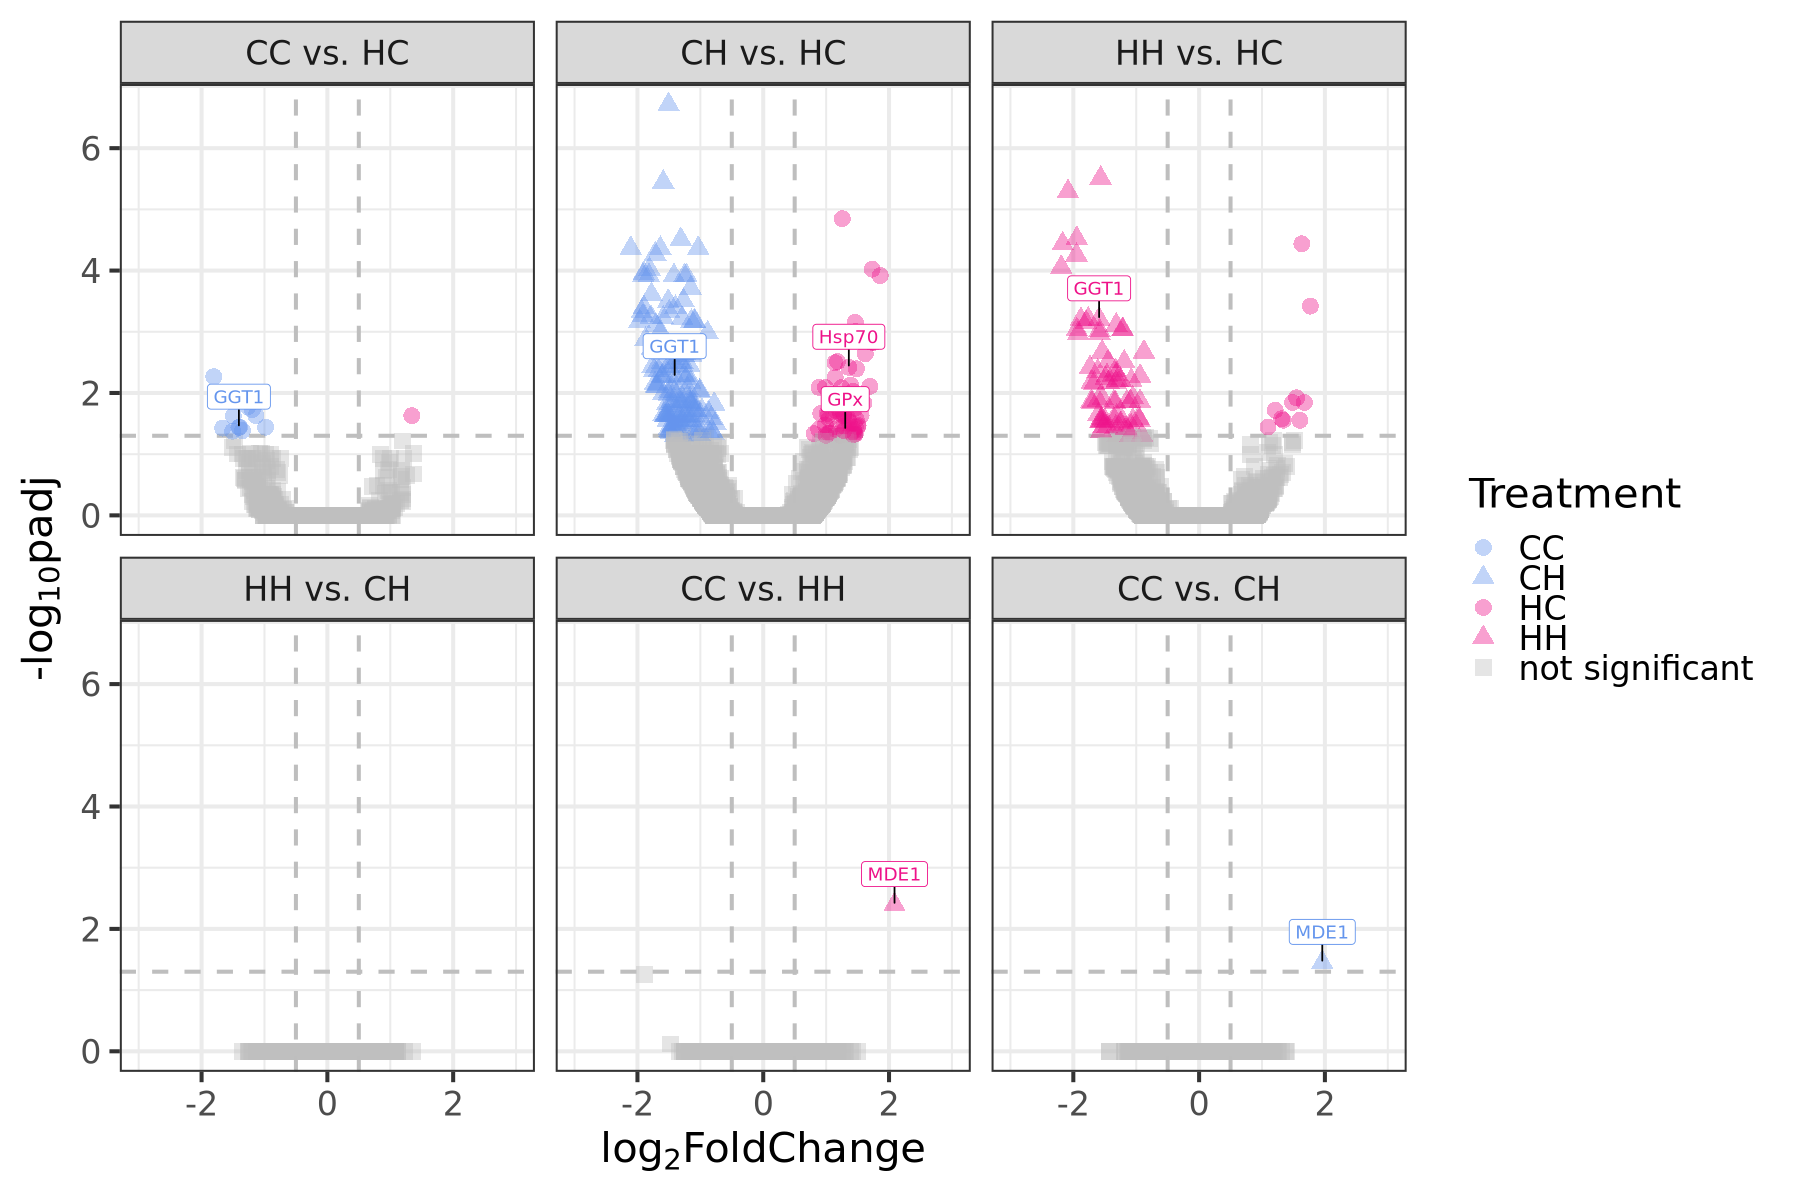

In [24]:
volcano_MEGA <- ggplot(mega_df, aes(x = log2FoldChange,
                                    y = -log10(padj),
                                    col = Treatment,
                                    shape = Treatment)) +
  geom_vline(xintercept = c(-0.5,0.5), col = "gray", linetype = 'dashed') +
  geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') +
  geom_point(size=4, alpha = 0.4) +

  # labeling genes
  geom_label_repel(data = shared_bottom, aes(label = 'MDE1'),
                   force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  geom_label_repel(data = gpx, aes(label = 'GPx'),
                   force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  geom_label_repel(data = ggt1, aes(label = 'GGT1'),
                   force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  geom_label_repel(data = hsp70, aes(label = 'Hsp70'),
                   force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +

  # combined color and shape scale
scale_color_manual(
  values = c("CC" = "cornflowerblue",
             "CH" = "cornflowerblue",
             "HC" = "deeppink2",
             "HH" = "deeppink2",
            "not significant" = "gray")
) +
scale_shape_manual(
  values = c("CC" = 16,
             "CH" = 17,
             "HC" = 16,
             "HH" = 17,
            "not significant" = 15)
) +
  theme_bw(base_size = 25) +
  guides(color = guide_legend(order = 1), shape = guide_legend(order = 1)) +  # combined legend
  facet_wrap(~pair, labeller = as_labeller(new_labels)) +
  labs(x = expression("log"[2]*"FoldChange"), 
       y = expression("-log"[10]*"padj")) +
  scale_x_continuous(limits = c(-3, 3))

volcano_MEGA

In [40]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/metaVolc_withGenes_numb.pdf', volcano_MEGA,
      width = 15, heigh = 10)

#### making fig 3

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggvenn package.
  Please report the issue to the authors.”


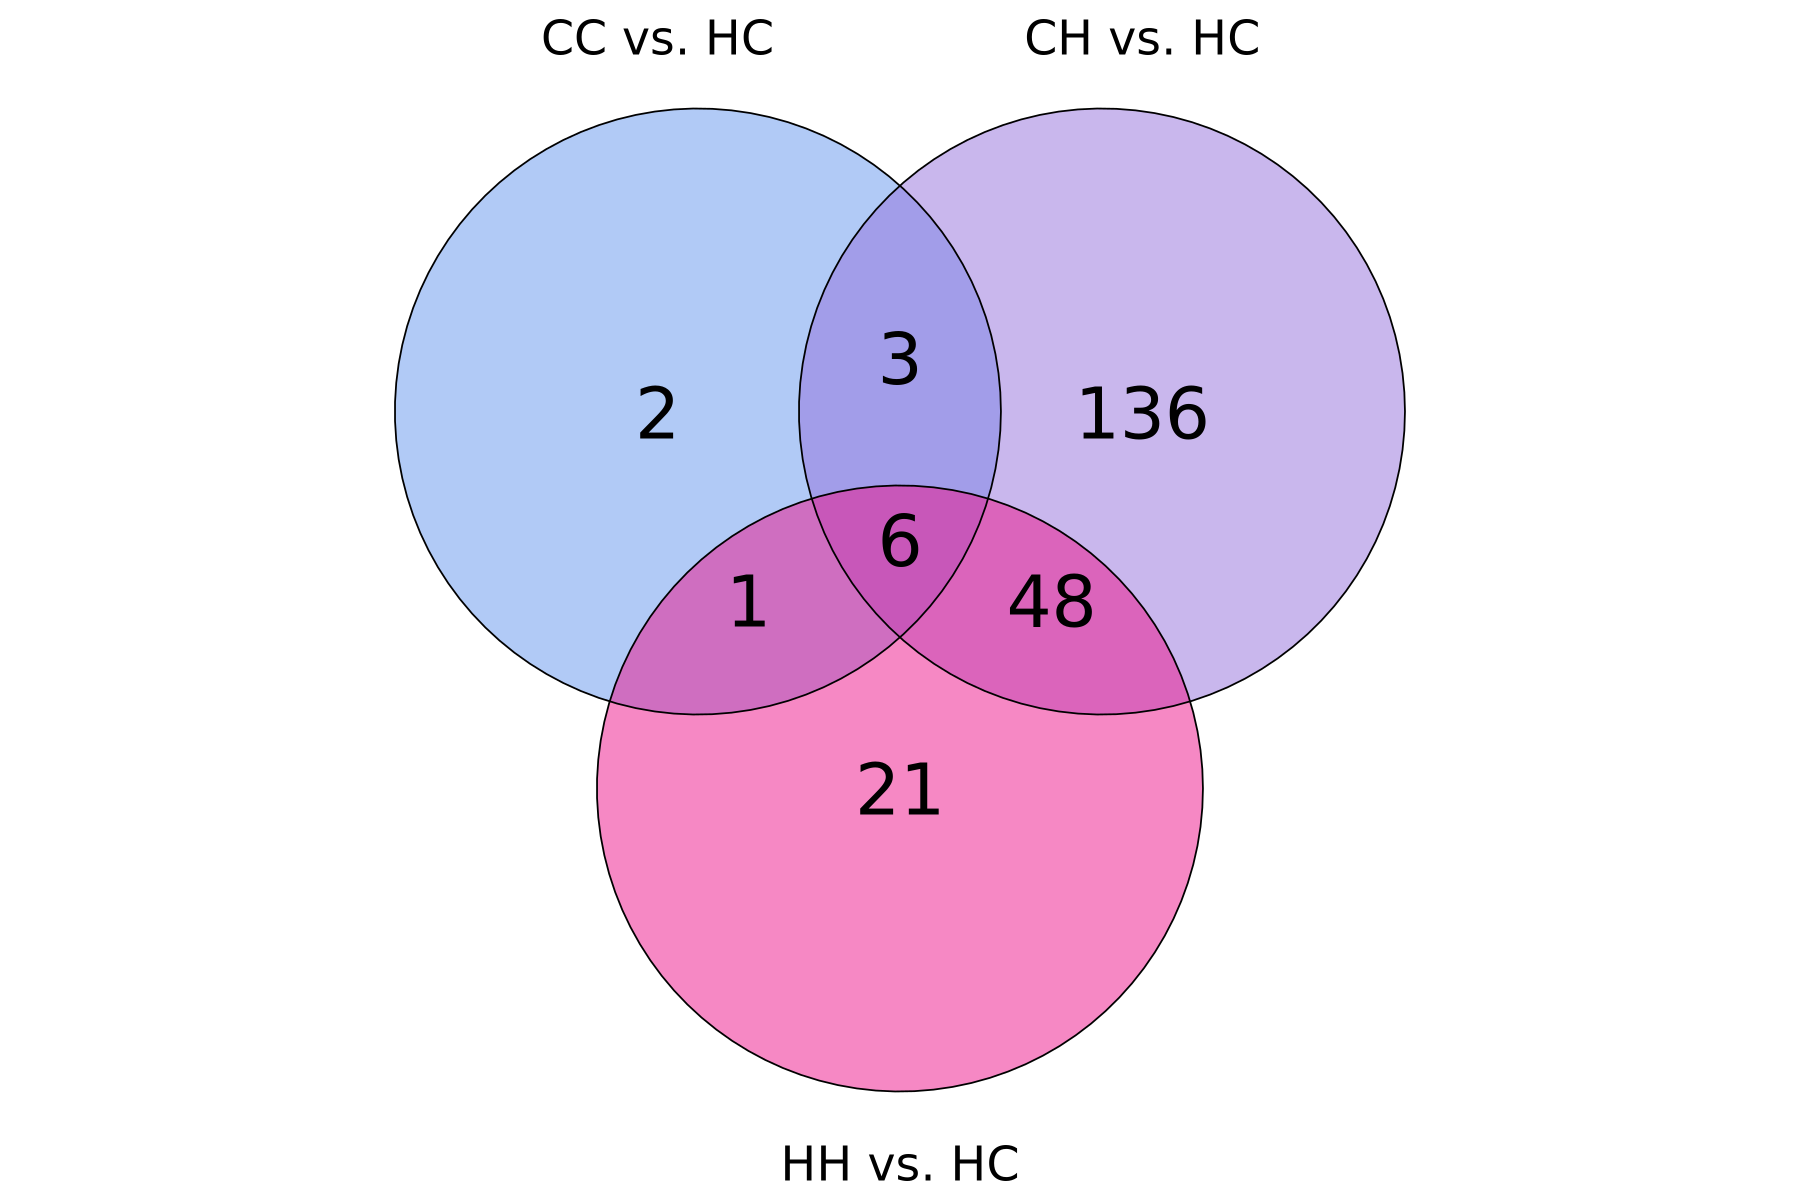

In [28]:
# copying code from DMGs.ipynb
sig_CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/sig_CC_HC_genes.csv')
sig_CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/sig_CH_HC_genes.csv')
sig_HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/sig_HH_HC_genes.csv')

x = list(A = sig_CC_HC$symbol,
         B = sig_CH_HC$symbol, 
         C = sig_HH_HC$symbol)

names(x) <- c('CC vs. HC',
              'CH vs. HC',
              'HH vs. HC')

# same colors as used in the volcano plots
custom_colors <- c('cornflowerblue',  'mediumpurple', 'deeppink2')

venn <- ggvenn(x,
      set_name_size = 10,
       text_size = 15,
      stroke_size = 0.5, 
       show_percentage = FALSE,
      fill_color = custom_colors)

venn

based on what I'm seeing in hypo- and hyper- methylation section, I think there's something up with the above venn diagram - the number of DMGs aren't lining up. Going to use the mega_df to pull out comparisons instead

In [31]:
# make function
filter_mega <- function(data, pair_value) {
  data %>%
    filter(pair == pair_value & methyl != 'not significant')
}

# CC vs HC
cc.hc <- filter_mega(mega_df, 'CC_HC')
head(cc.hc)

# CH vs HC
ch.hc <- filter_mega(mega_df, 'CH_HC')
head(ch.hc)

# HH vs HC
hh.hc <- filter_mega(mega_df, 'HH_HC')
head(hh.hc)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl,phase1_moreMe,phase2_moreMe
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,LOC111119327,13.31739,-1.5071778,0.3154716,-3.985075,6.745881e-05,0.04225732,CC_HC,CC,Control,Control
2,LOC111118022,19.27594,-1.6641421,0.3486511,-4.056038,4.991215e-05,0.03751897,CC_HC,CC,Control,Control
3,LOC111123492,43.91933,-1.2645908,0.2211555,-4.587681,4.481962e-06,0.01684546,CC_HC,CC,Control,Control
4,LOC111124674,17.57497,-1.4067061,0.2805413,-4.123123,3.737706e-05,0.03630337,CC_HC,CC,Control,Control
5,LOC111129146,22.23491,1.3427188,0.2551562,4.282548,1.847653e-05,0.02350342,CC_HC,HC,Hypoxic,Control
6,LOC111133874,106.76763,-0.9820156,0.1780116,-4.112179,3.919417e-05,0.03630337,CC_HC,CC,Control,Control


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl,phase1_moreMe,phase2_moreMe
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,LOC111133260,47.32761,-1.252909,0.1909959,-5.250946,1.513200e-07,0.0001206848,CH_HC,CH,Control,Hypoxic
2,LOC111132155,15.68891,-1.610318,0.3063351,-4.440620,8.970017e-06,0.0022920612,CH_HC,CH,Control,Hypoxic
3,LOC111113022,22.94658,-1.785998,0.3172529,-4.841557,1.288255e-06,0.0005743709,CH_HC,CH,Control,Hypoxic
4,LOC111131329,61.85996,-1.173904,0.2150709,-4.295812,1.740547e-05,0.0035513059,CH_HC,CH,Control,Hypoxic
5,LOC111104327,95.77165,-1.090093,0.2206110,-3.808027,1.400802e-04,0.0154705034,CH_HC,CH,Control,Hypoxic
6,LOC111108643,20.24159,-1.351946,0.3067237,-3.592633,3.273533e-04,0.0269909550,CH_HC,CH,Control,Hypoxic


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl,phase1_moreMe,phase2_moreMe
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,LOC111133260,47.327606,-0.9609981,0.1844565,3.854558,1.159391e-04,2.584583e-02,HH_HC,HH,Hypoxic,Hypoxic
2,LOC111109809,2.629455,-1.6982506,0.3601734,4.020982,5.795609e-05,1.428055e-02,HH_HC,HH,Hypoxic,Hypoxic
3,LOC111137635,54.920590,-1.2554517,0.2680594,3.750854,1.762332e-04,3.166410e-02,HH_HC,HH,Hypoxic,Hypoxic
4,LOC111131329,61.859959,-1.1909243,0.2077259,4.529644,5.908321e-06,3.092364e-03,HH_HC,HH,Hypoxic,Hypoxic
5,LOC111115873,8.605695,-1.5355178,0.3373803,3.810293,1.388020e-04,2.786462e-02,HH_HC,HH,Hypoxic,Hypoxic
6,LOC111108235,16.382322,-2.1691724,0.3390974,5.659649,1.516832e-08,3.651925e-05,HH_HC,HH,Hypoxic,Hypoxic


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggvenn package.
  Please report the issue to the authors.”


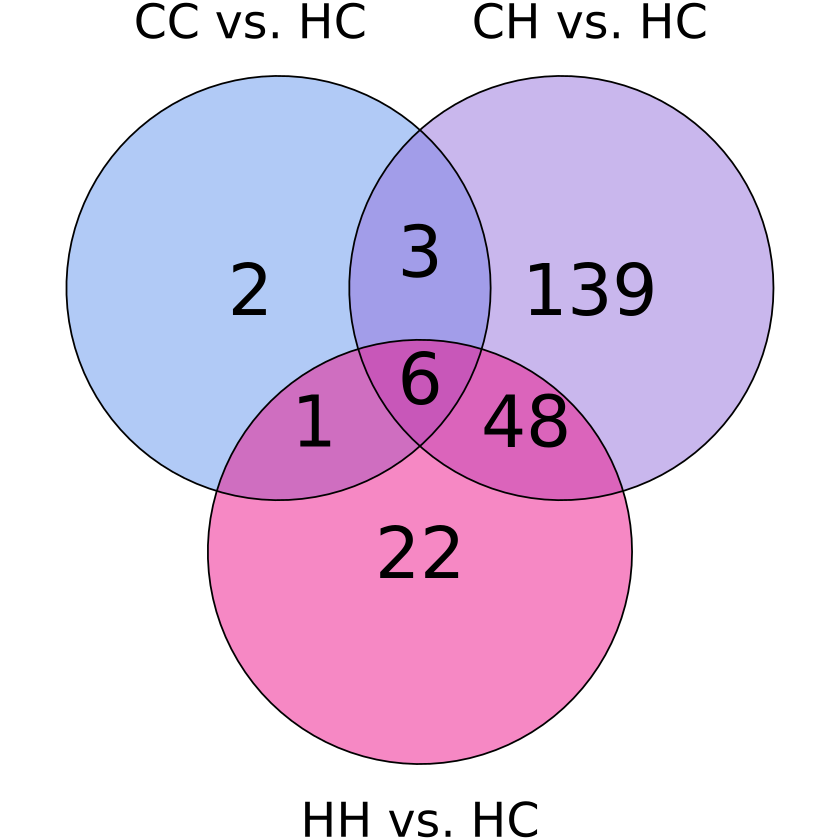

In [32]:
x = list(A = cc.hc$X,
         B = ch.hc$X, 
         C = hh.hc$X)

names(x) <- c('CC vs. HC',
              'CH vs. HC',
              'HH vs. HC')

# same colors as used in the volcano plots
custom_colors <- c('cornflowerblue',  'mediumpurple', 'deeppink2')

venn <- ggvenn(x,
      set_name_size = 10,
       text_size = 15,
      stroke_size = 0.5, 
       show_percentage = FALSE,
      fill_color = custom_colors)

venn

In [34]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/venn_updated.pdf', venn)

Saving 6.67 x 6.67 in image


## splitting volcano plot into separate panels

In [7]:
cc.hc.df <- mega_df %>%
filter(pair == 'CC_HC')

ch.hc.df <- mega_df %>%
filter(pair == 'CH_HC')

hh.hc.df <- mega_df %>%
filter(pair == 'HH_HC')

hh.ch.df <- mega_df %>%
filter(pair == 'HH_CH')

hh.cc.df <- mega_df %>%
filter(pair == 'HH_CC')

cc.ch.df <- mega_df %>%
filter(pair == 'CC_CH')

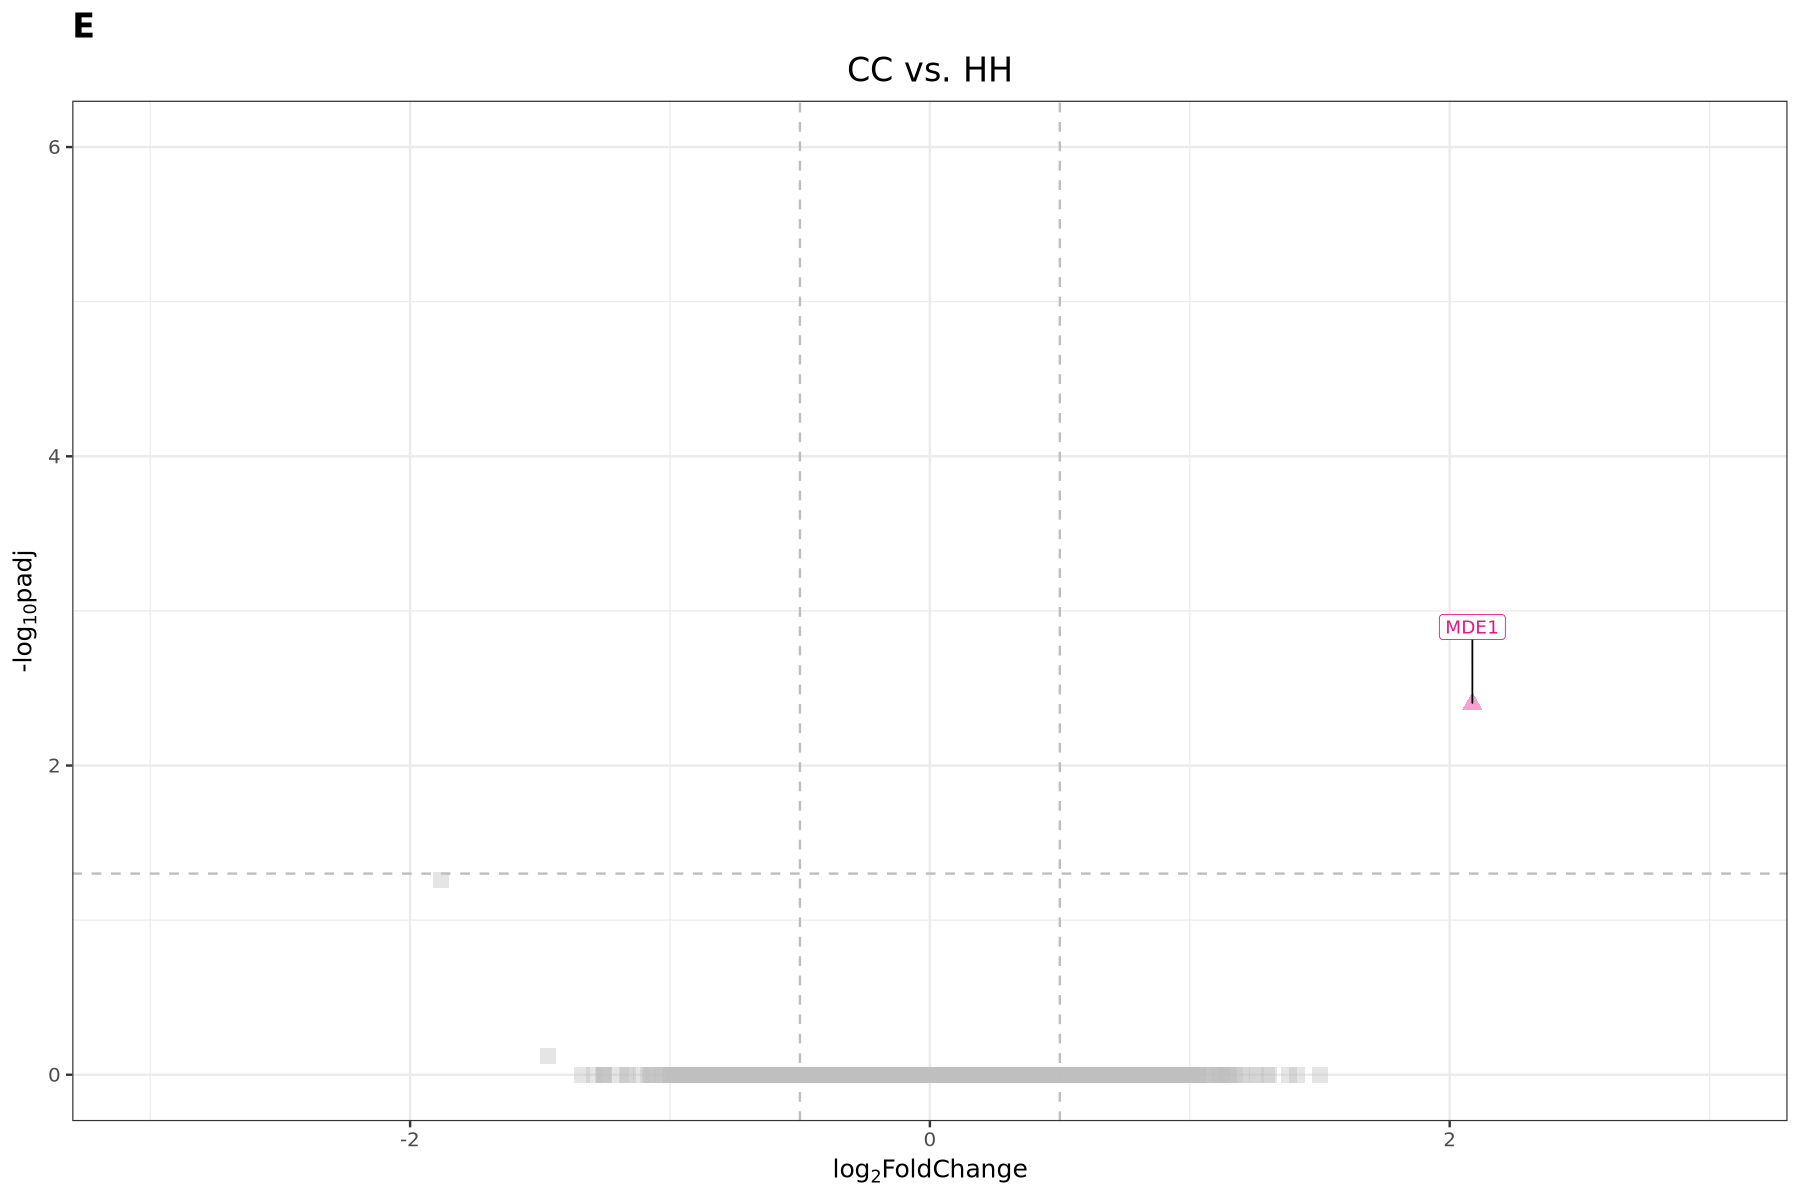

In [25]:
hh.cc.mde <- shared_bottom %>% filter(pair == 'HH_CC')

fig3e <- ggplot(hh.cc.df, aes(x = log2FoldChange,
                                    y = -log10(padj),
                                    col = methyl,
                                    shape = methyl)) +
# vertical line
  geom_vline(xintercept = c(-0.5,0.5), 
             col = "gray", 
             linetype = 'dashed') +
# horizontal line
  geom_hline(yintercept = -log10(0.05), 
             col = "gray", 
             linetype = 'dashed') +
  geom_point(size=4, 
             alpha = 0.4) +

  # labeling genes
  geom_label_repel(data = hh.cc.mde, aes(label = 'MDE1'),
                   force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = ch.hc.gpx, aes(label = 'GPx'),
   #                force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = hh.hc.ggt, aes(label = 'GGT1'),
   #                force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = hsp70, aes(label = 'Hsp70'),
   #                force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +

  # combined color and shape scale
scale_color_manual(
  values = c("CC" = "cornflowerblue",
             "CH" = "cornflowerblue",
             "HC" = "deeppink2",
             "HH" = "deeppink2",
            "not significant" = "gray")
) +
scale_shape_manual(
  values = c("CC" = 16,
             "CH" = 17,
             "HC" = 16,
             "HH" = 17,
            "not significant" = 15)
) +
  theme_bw(base_size = 15) +
  guides(color = "none", shape = "none") +  # combined legend
  labs(x = expression("log"[2]*"FoldChange"), 
       y = expression("-log"[10]*"padj"),
      title = 'E',
      subtitle = 'CC vs. HH') +
  scale_x_continuous(limits = c(-3, 3)) +
  scale_y_continuous(limits = c(0, 6)) +
theme(plot.subtitle = element_text(hjust=0.5, size = 20),
      plot.title = element_text(face = "bold", size = 20))


fig3e

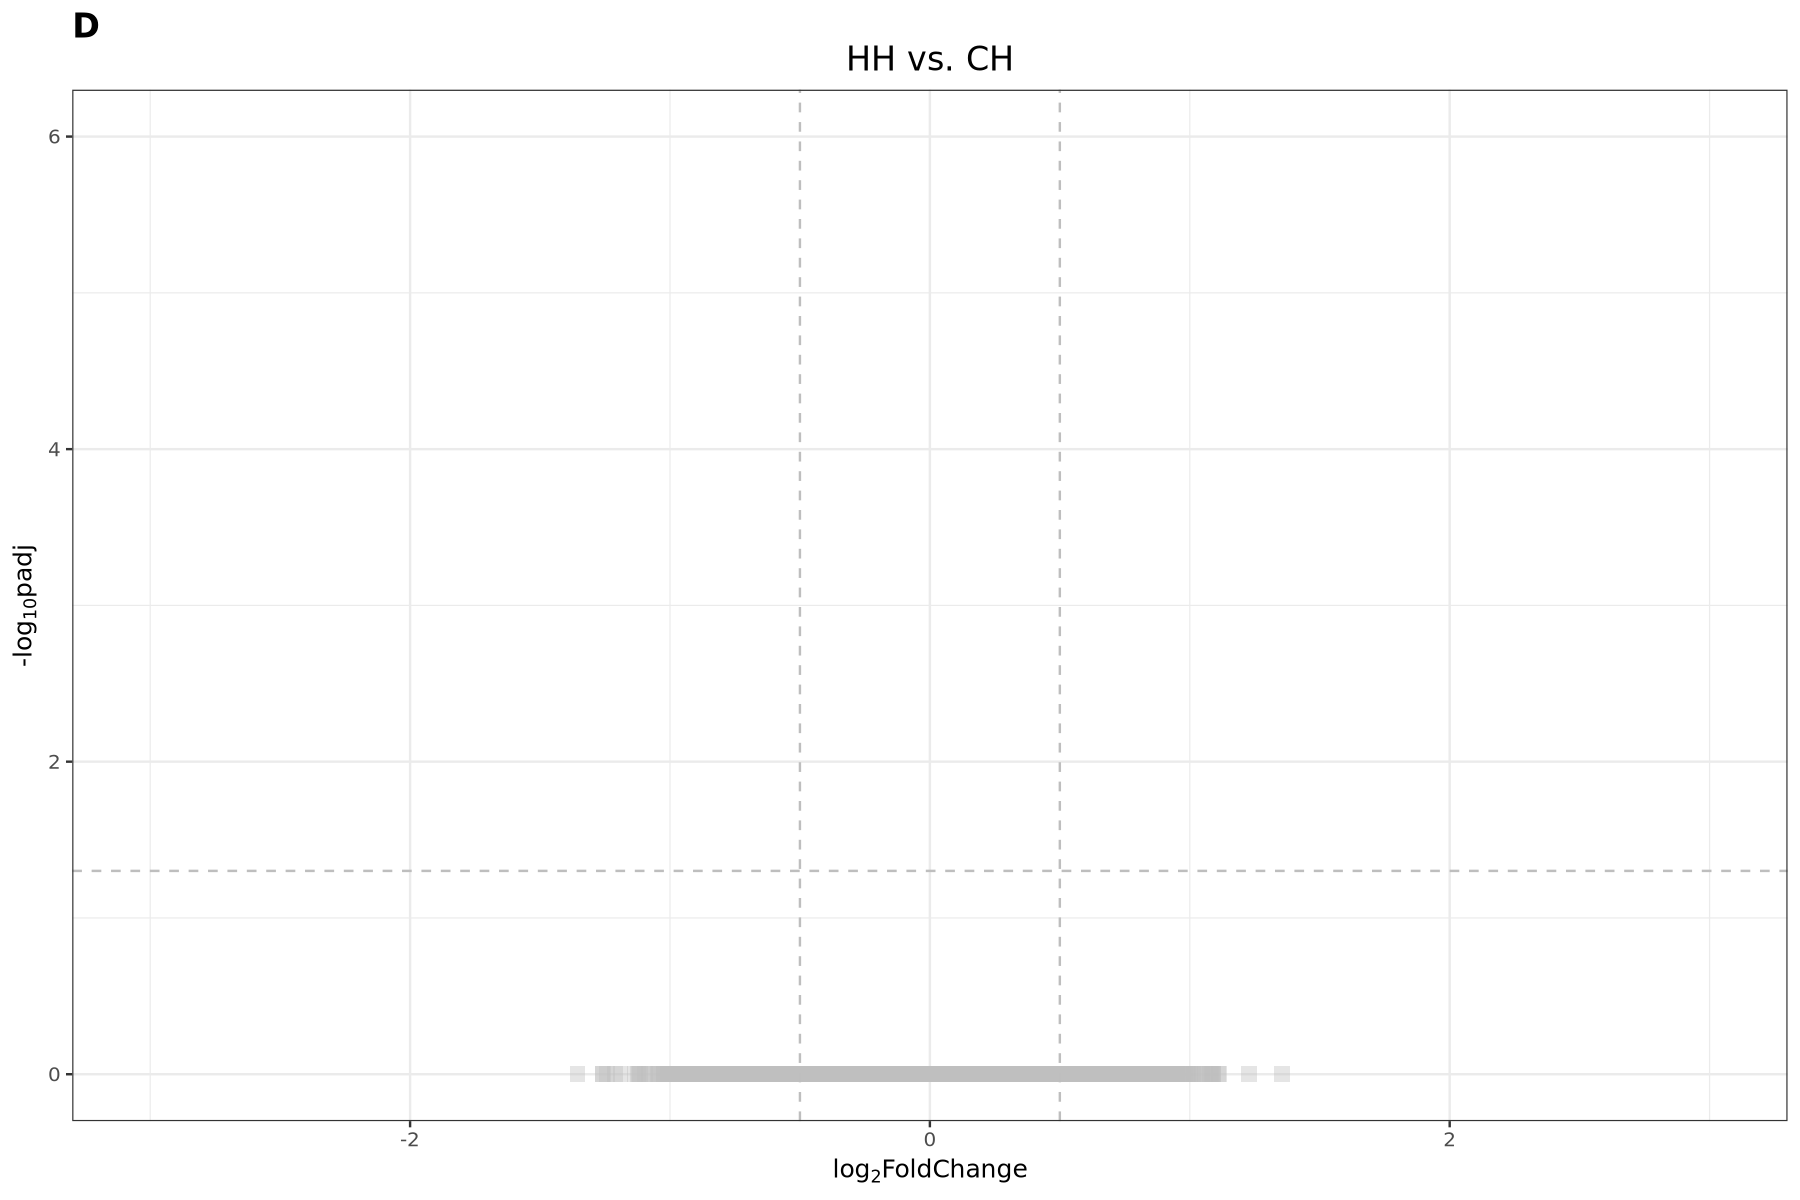

In [24]:

fig3d <- ggplot(hh.ch.df, aes(x = log2FoldChange,
                                    y = -log10(padj),
                                    col = methyl,
                                    shape = methyl)) +
# vertical line
  geom_vline(xintercept = c(-0.5,0.5), 
             col = "gray", 
             linetype = 'dashed') +
# horizontal line
  geom_hline(yintercept = -log10(0.05), 
             col = "gray", 
             linetype = 'dashed') +
  geom_point(size=4, 
             alpha = 0.4) +

  # labeling genes
  #geom_label_repel(data = shared_bottom, aes(label = 'MDE1'),
   #                force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = ch.hc.gpx, aes(label = 'GPx'),
   #                force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = hh.hc.ggt, aes(label = 'GGT1'),
   #                force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = hsp70, aes(label = 'Hsp70'),
   #                force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +

  # combined color and shape scale
scale_color_manual(
  values = c("CC" = "cornflowerblue",
             "CH" = "cornflowerblue",
             "HC" = "deeppink2",
             "HH" = "deeppink2",
            "not significant" = "gray")
) +
scale_shape_manual(
  values = c("CC" = 16,
             "CH" = 17,
             "HC" = 16,
             "HH" = 17,
            "not significant" = 15)
) +
  theme_bw(base_size = 15) +
  guides(color = "none", shape = "none") +  # combined legend
  labs(x = expression("log"[2]*"FoldChange"), 
       y = expression("-log"[10]*"padj"),
      title = 'D',
      subtitle = 'HH vs. CH') +
  scale_x_continuous(limits = c(-3, 3)) +
  scale_y_continuous(limits = c(0, 6)) +
theme(plot.subtitle = element_text(hjust=0.5, size = 20),
      plot.title = element_text(face = "bold", size = 20))


fig3d

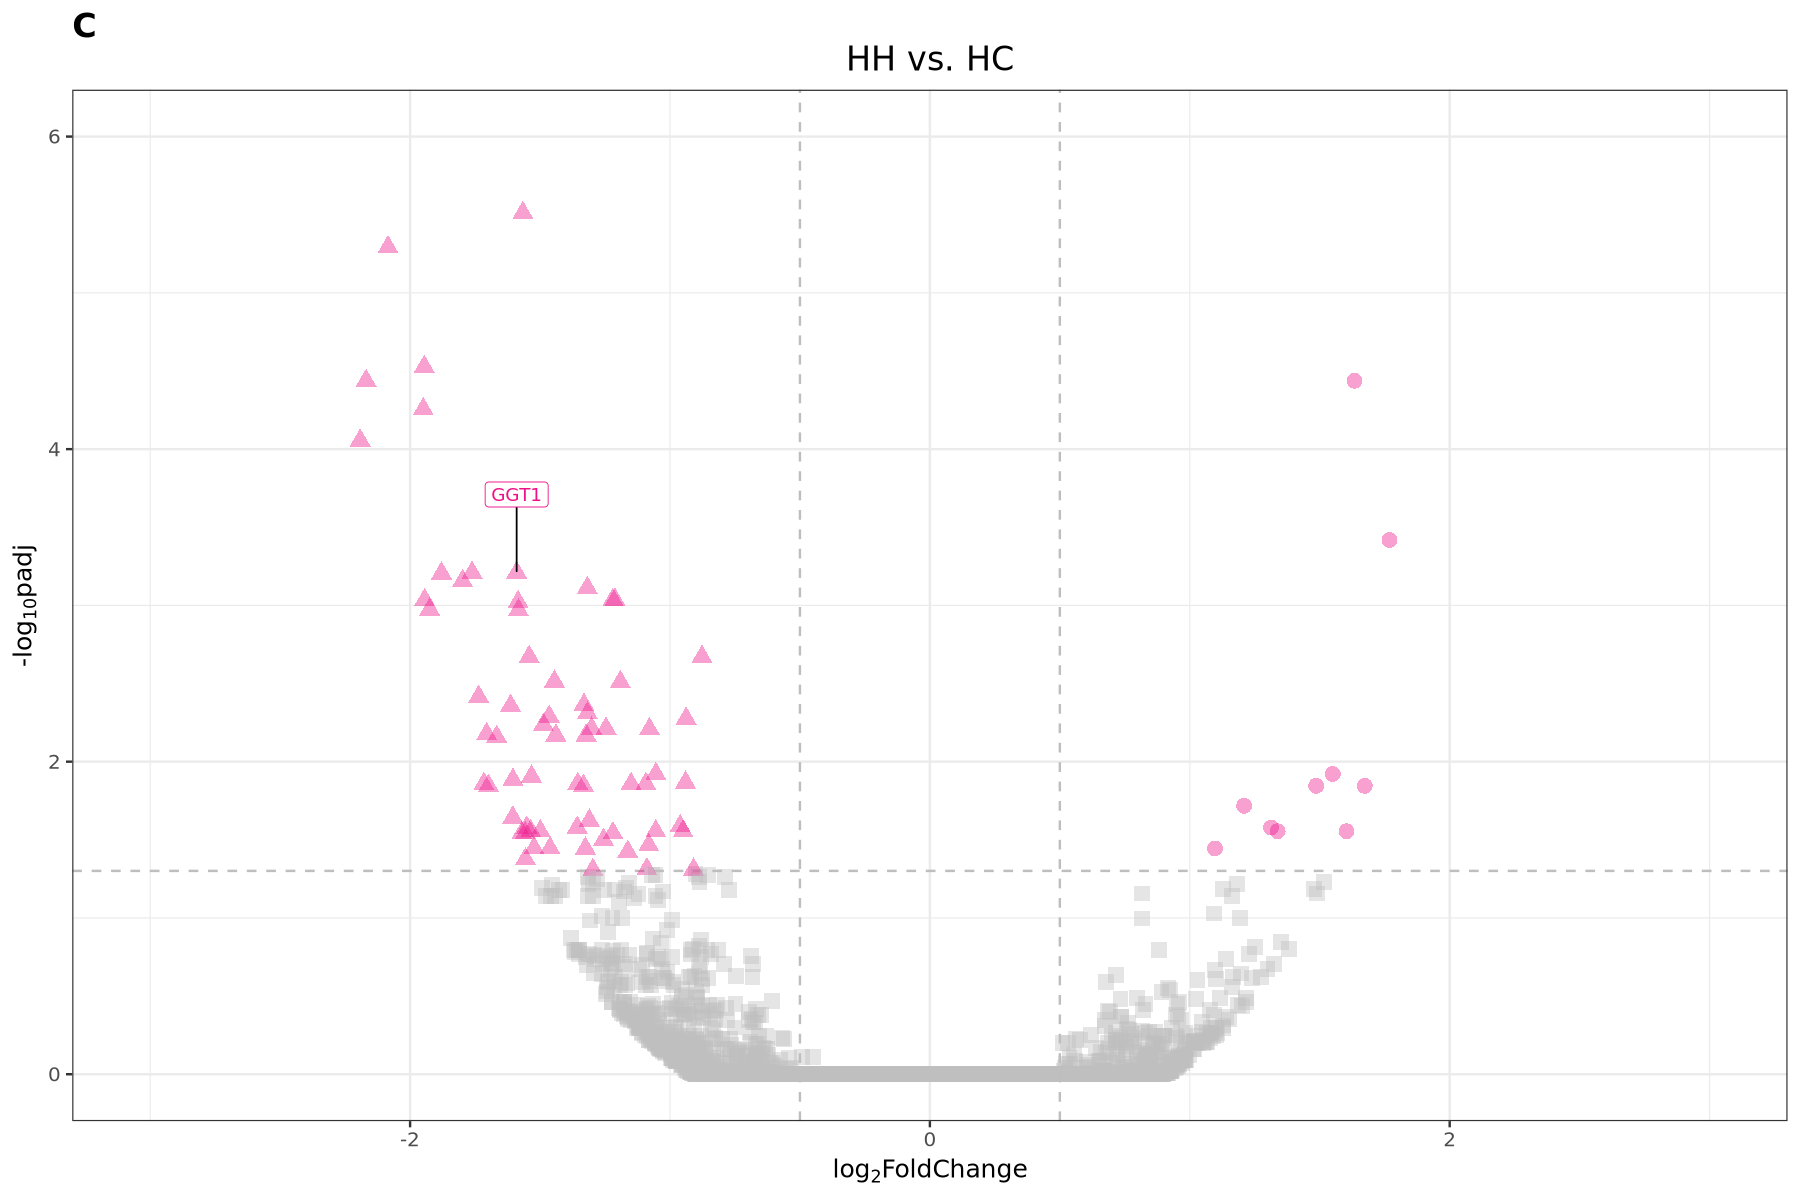

In [23]:
hh.hc.ggt <- ggt1 %>% filter(pair == 'HH_HC')

fig3c <- ggplot(hh.hc.df, aes(x = log2FoldChange,
                                    y = -log10(padj),
                                    col = methyl,
                                    shape = methyl)) +
# vertical line
  geom_vline(xintercept = c(-0.5,0.5), 
             col = "gray", 
             linetype = 'dashed') +
# horizontal line
  geom_hline(yintercept = -log10(0.05), 
             col = "gray", 
             linetype = 'dashed') +
  geom_point(size=4, 
             alpha = 0.4) +

  # labeling genes
  #geom_label_repel(data = shared_bottom, aes(label = 'MDE1'),
   #                force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = ch.hc.gpx, aes(label = 'GPx'),
   #                force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  geom_label_repel(data = hh.hc.ggt, aes(label = 'GGT1'),
                   force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = hsp70, aes(label = 'Hsp70'),
   #                force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +

  # combined color and shape scale
scale_color_manual(
  values = c("CC" = "cornflowerblue",
             "CH" = "cornflowerblue",
             "HC" = "deeppink2",
             "HH" = "deeppink2",
            "not significant" = "gray")
) +
scale_shape_manual(
  values = c("CC" = 16,
             "CH" = 17,
             "HC" = 16,
             "HH" = 17,
            "not significant" = 15)
) +
  theme_bw(base_size = 15) +
  guides(color = "none", shape = "none") +  # combined legend
  labs(x = expression("log"[2]*"FoldChange"), 
       y = expression("-log"[10]*"padj"),
      title = 'C',
      subtitle = 'HH vs. HC') +
  scale_x_continuous(limits = c(-3, 3)) +
  scale_y_continuous(limits = c(0, 6)) +
theme(plot.subtitle = element_text(hjust=0.5, size = 20),
      plot.title = element_text(face = "bold", size = 20))


fig3c

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


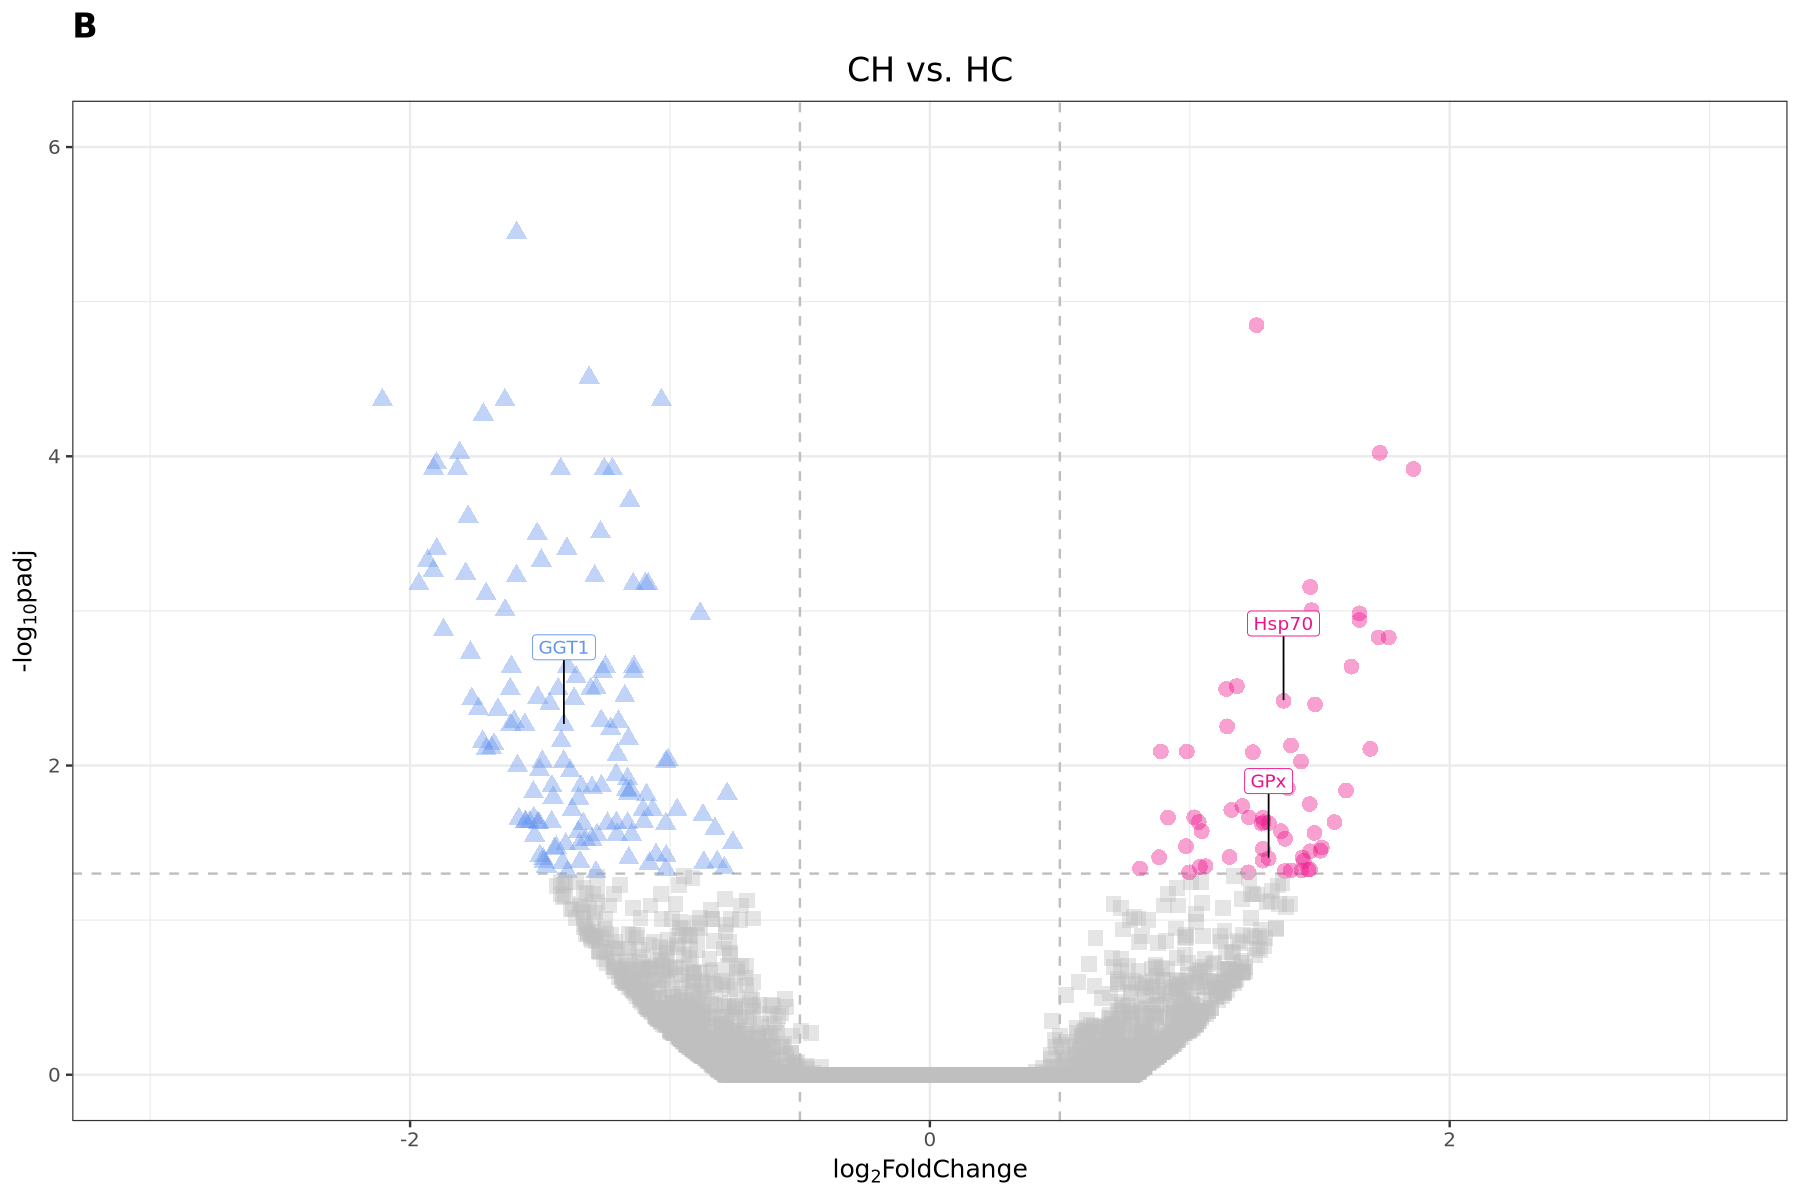

In [22]:
ch.hc.ggt <- ggt1 %>% filter(pair == 'CH_HC')
ch.hc.gpx <- gpx %>% filter(pair == 'CH_HC')

fig3b <- ggplot(ch.hc.df, aes(x = log2FoldChange,
                                    y = -log10(padj),
                                    col = methyl,
                                    shape = methyl)) +
# vertical line
  geom_vline(xintercept = c(-0.5,0.5), 
             col = "gray", 
             linetype = 'dashed') +
# horizontal line
  geom_hline(yintercept = -log10(0.05), 
             col = "gray", 
             linetype = 'dashed') +
  geom_point(size=4, 
             alpha = 0.4) +

  # labeling genes
  #geom_label_repel(data = shared_bottom, aes(label = 'MDE1'),
   #                force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  geom_label_repel(data = ch.hc.gpx, aes(label = 'GPx'),
                   force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  geom_label_repel(data = ch.hc.ggt, aes(label = 'GGT1'),
                   force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  geom_label_repel(data = hsp70, aes(label = 'Hsp70'),
                   force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +

  # combined color and shape scale
scale_color_manual(
  values = c("CC" = "cornflowerblue",
             "CH" = "cornflowerblue",
             "HC" = "deeppink2",
             "HH" = "deeppink2",
            "not significant" = "gray")
) +
scale_shape_manual(
  values = c("CC" = 16,
             "CH" = 17,
             "HC" = 16,
             "HH" = 17,
            "not significant" = 15)
) +
  theme_bw(base_size = 15) +
  guides(color = "none", shape = "none") +  # combined legend
  labs(x = expression("log"[2]*"FoldChange"), 
       y = expression("-log"[10]*"padj"),
      title = 'B',
      subtitle = 'CH vs. HC') +
  scale_x_continuous(limits = c(-3, 3)) +
  scale_y_continuous(limits = c(0, 6)) +
theme(plot.subtitle = element_text(hjust=0.5, size = 20),
      plot.title = element_text(face = "bold", size = 20))


fig3b

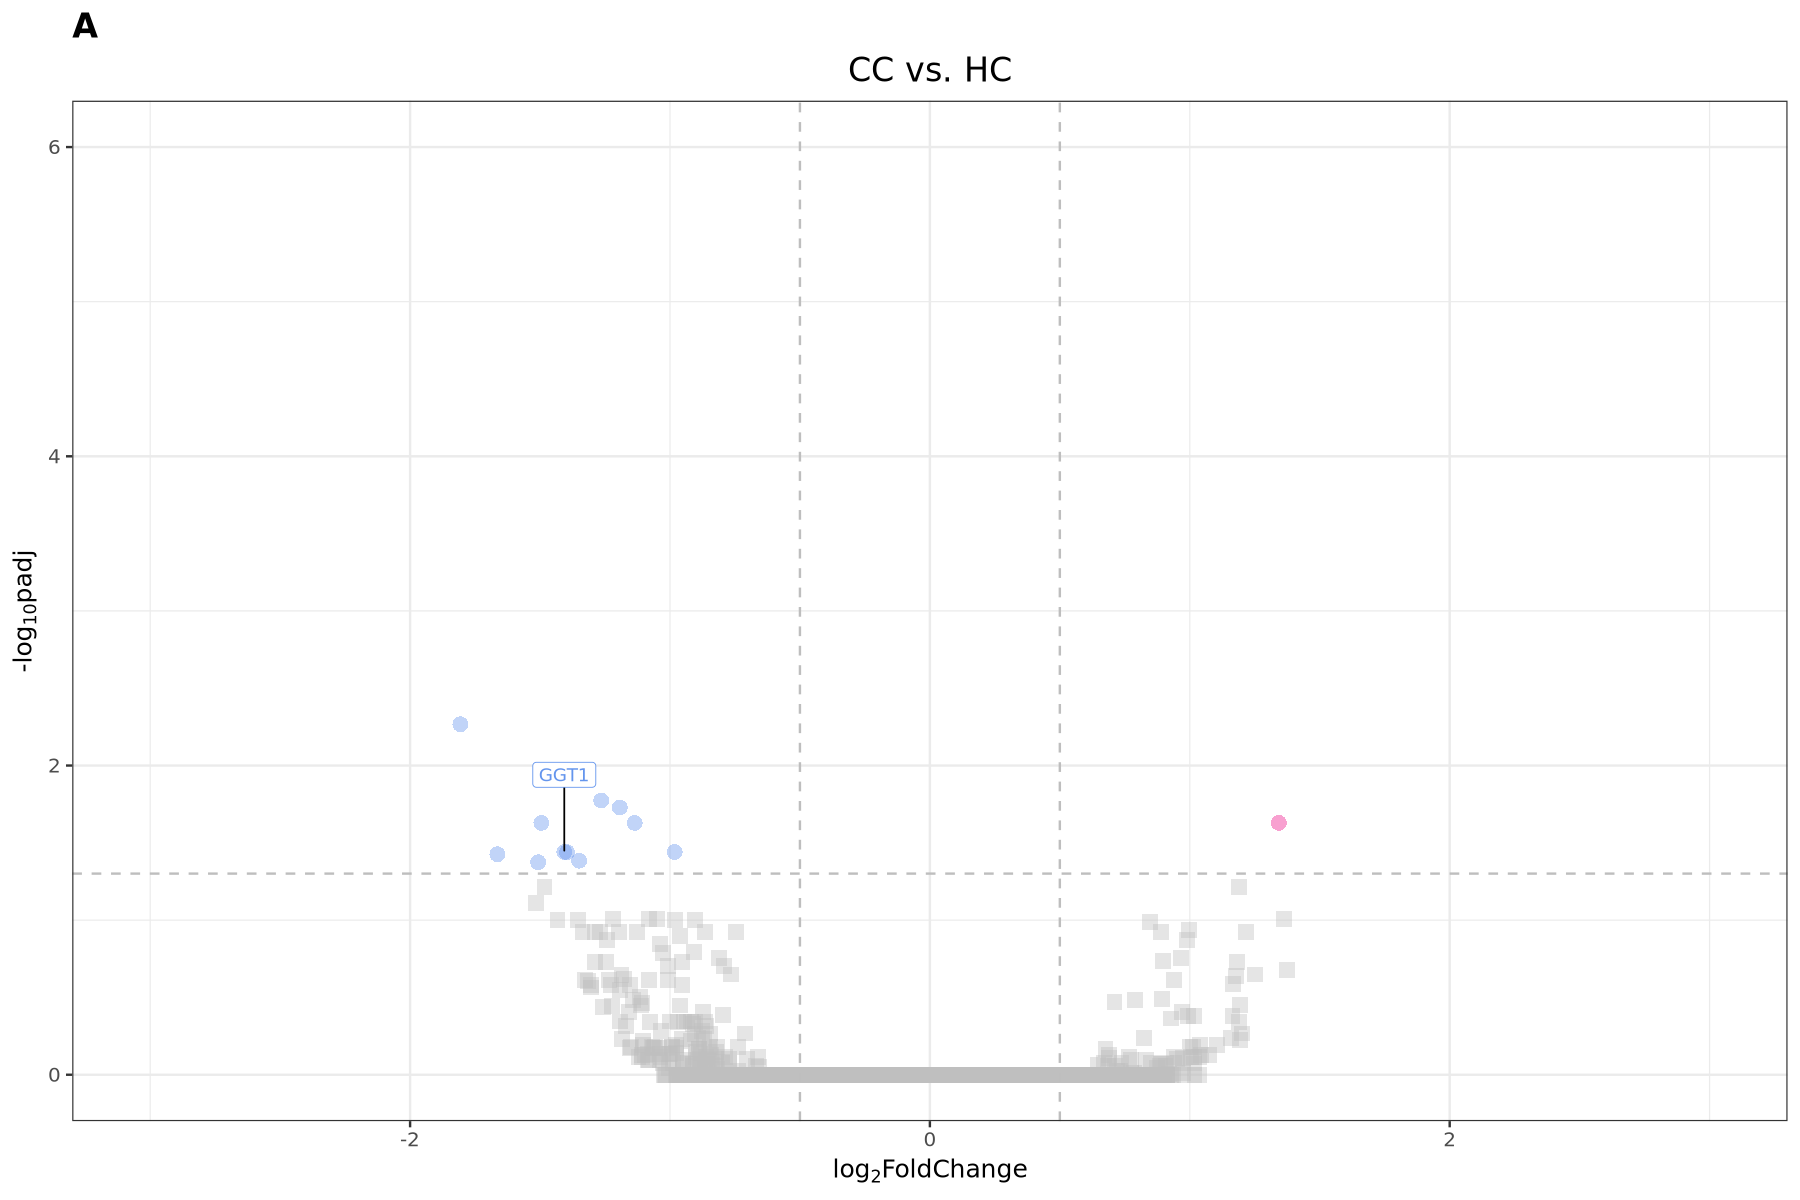

In [21]:
cc.hc.ggt <- ggt1[1,]

fig3a <- ggplot(cc.hc.df, aes(x = log2FoldChange,
                                    y = -log10(padj),
                                    col = methyl,
                                    shape = methyl)) +
# vertical line
  geom_vline(xintercept = c(-0.5,0.5), 
             col = "gray", 
             linetype = 'dashed') +
# horizontal line
  geom_hline(yintercept = -log10(0.05), 
             col = "gray", 
             linetype = 'dashed') +
  geom_point(size=4, 
             alpha = 0.4) +

  # labeling genes
  #geom_label_repel(data = shared_bottom, aes(label = 'MDE1'),
   #                force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = gpx, aes(label = 'GPx'),
     #              force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  geom_label_repel(data = cc.hc.ggt, aes(label = 'GGT1'),
                   force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = hsp70, aes(label = 'Hsp70'),
   #                force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +

  # combined color and shape scale
scale_color_manual(
  values = c("CC" = "cornflowerblue",
             "CH" = "cornflowerblue",
             "HC" = "deeppink2",
             "HH" = "deeppink2",
            "not significant" = "gray")
) +
scale_shape_manual(
  values = c("CC" = 16,
             "CH" = 17,
             "HC" = 16,
             "HH" = 17,
            "not significant" = 15)
) +
  theme_bw(base_size = 15) +
  guides(color = "none", shape = "none") +  # combined legend
  labs(x = expression("log"[2]*"FoldChange"), 
       y = expression("-log"[10]*"padj"),
      title = 'A',
      subtitle = 'CC vs. HC') +
  scale_x_continuous(limits = c(-3, 3)) +
  scale_y_continuous(limits = c(0, 6)) +
theme(plot.subtitle = element_text(hjust=0.5, size = 20),
      plot.title = element_text(face = "bold", size = 20))


fig3a

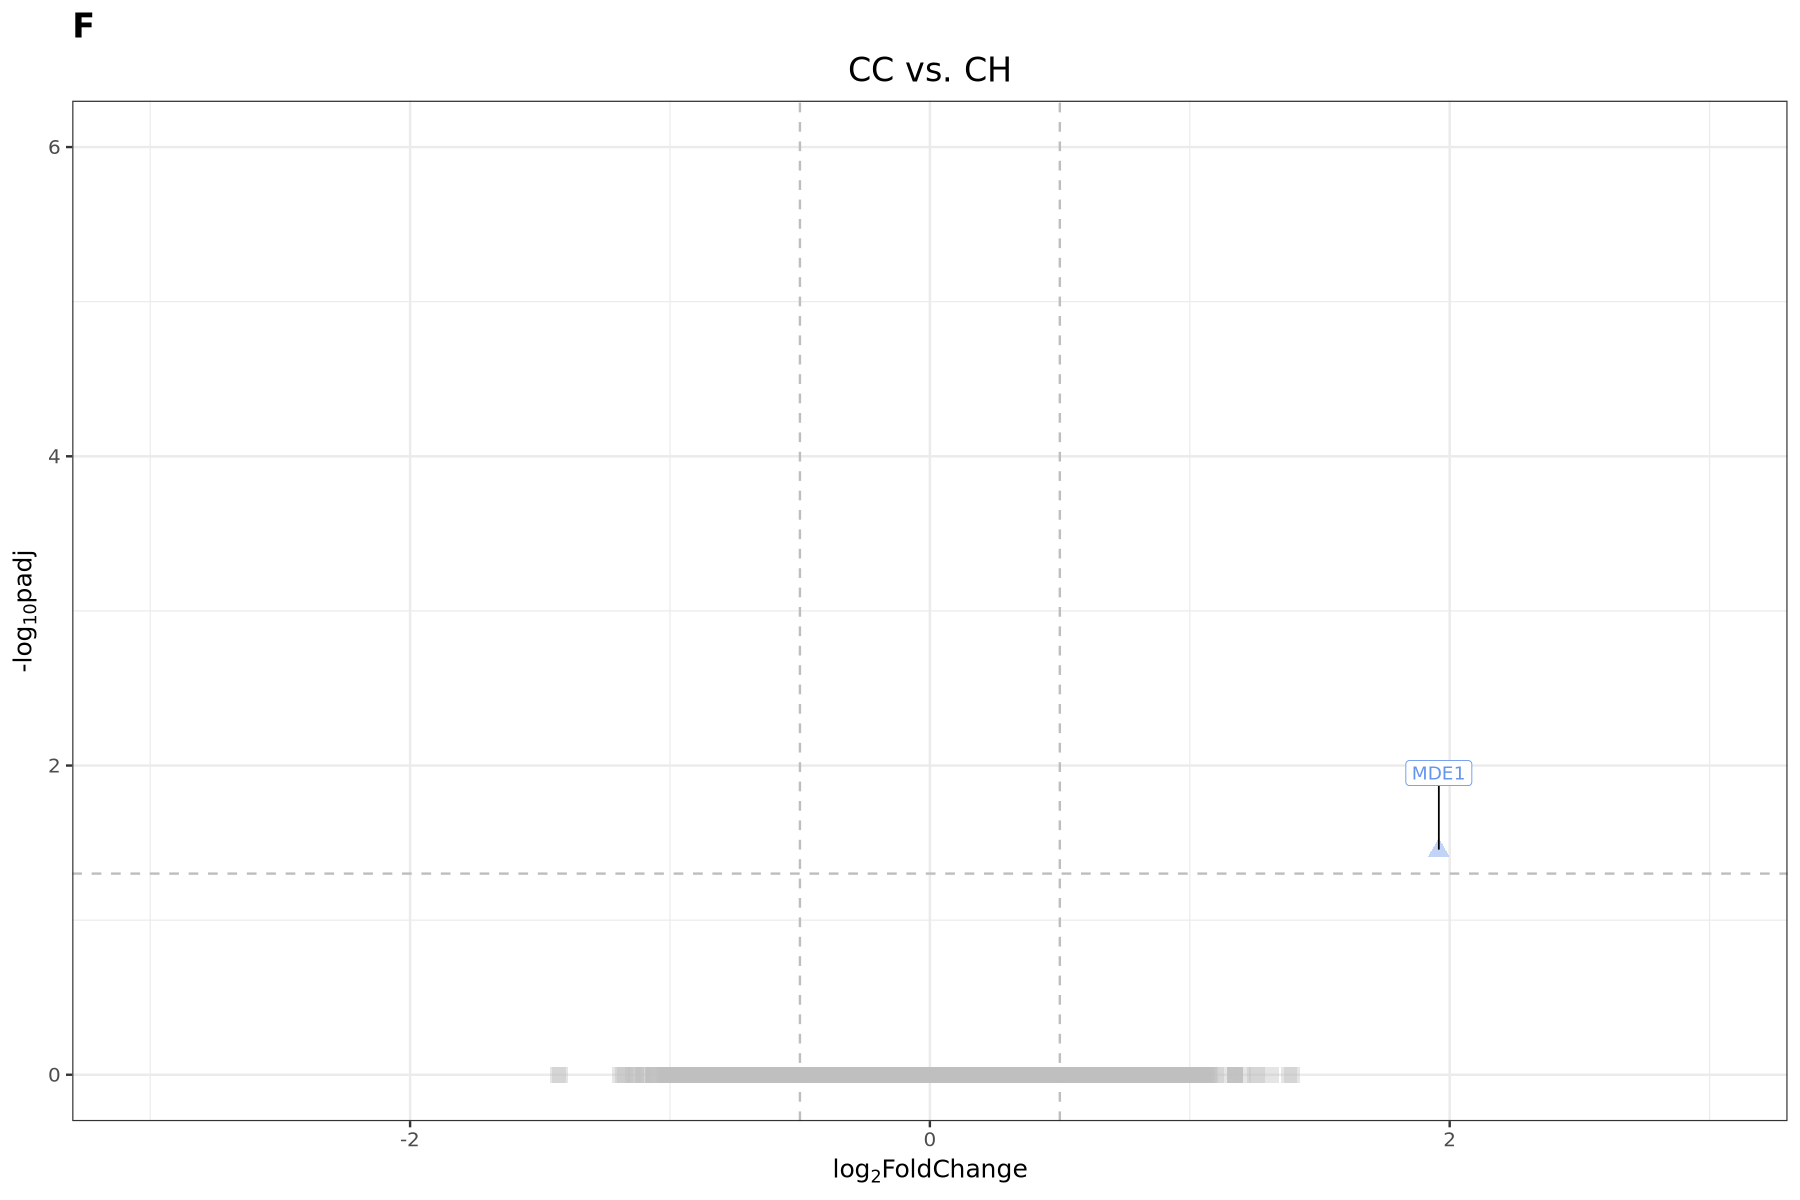

In [20]:
cc.ch.mde <- shared_bottom %>% filter(pair == 'CC_CH')

fig3f <- ggplot(cc.ch.df, aes(x = log2FoldChange,
                                    y = -log10(padj),
                                    col = methyl,
                                    shape = methyl)) +
# vertical line
  geom_vline(xintercept = c(-0.5,0.5), 
             col = "gray", 
             linetype = 'dashed') +
# horizontal line
  geom_hline(yintercept = -log10(0.05), 
             col = "gray", 
             linetype = 'dashed') +
  geom_point(size=4, 
             alpha = 0.4) +

  # labeling genes
  geom_label_repel(data = cc.ch.mde, aes(label = 'MDE1'),
                   force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = gpx, aes(label = 'GPx'),
     #              force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = ggt1, aes(label = 'GGT1'),
    #               force = 2, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +
  #geom_label_repel(data = hsp70, aes(label = 'Hsp70'),
   #                force = 4, nudge_y = 0.5, segment.color = "black", show.legend = FALSE) +

  # combined color and shape scale
scale_color_manual(
  values = c("CC" = "cornflowerblue",
             "CH" = "cornflowerblue",
             #"HC" = "deeppink2",
             #"HH" = "deeppink2",
            "not significant" = "gray")
) +
scale_shape_manual(
  values = c("CC" = 16,
             "CH" = 17,
             #"HC" = 16,
             #"HH" = 17,
            "not significant" = 15)
) +
  theme_bw(base_size = 15) +
  guides(color = "none", shape = "none") +  # combined legend
  labs(x = expression("log"[2]*"FoldChange"), 
       y = expression("-log"[10]*"padj"),
      title = 'F',
      subtitle = 'CC vs. CH') +
  scale_x_continuous(limits = c(-3, 3)) +
  scale_y_continuous(limits = c(0, 6)) +
theme(plot.subtitle = element_text(hjust=0.5, size = 20),
      plot.title = element_text(face = "bold", size = 20))

fig3f

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


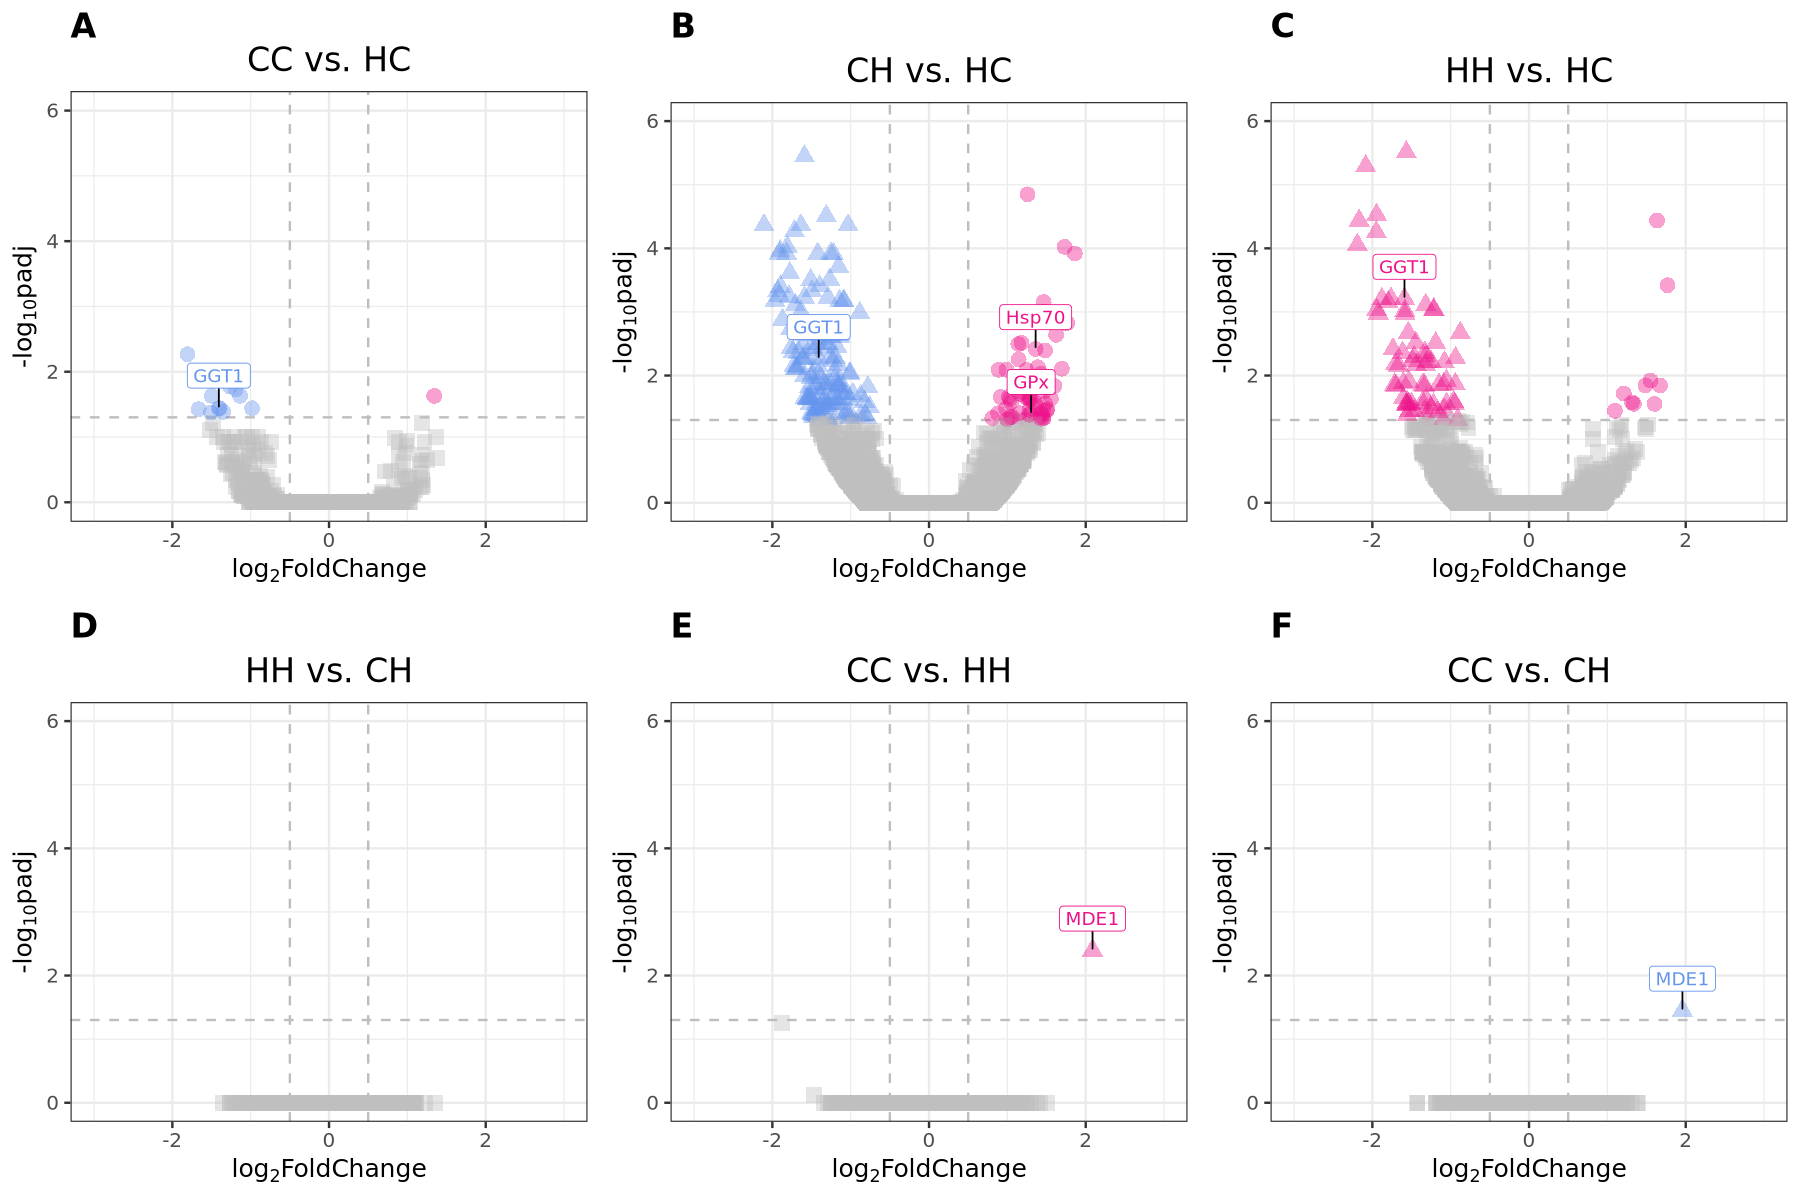

In [26]:
fig3 <- plot_grid(fig3a, fig3b, fig3c, fig3d, fig3e, fig3f, ncol = 3, nrow = 2)
fig3

In [30]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/fig3_panel.pdf', fig3, width=7.5, height=5)

## Hypo- and Hyper- methylation

Assigning/identifying not only # of DMGs in each pairwise comparison, but if they are hypo- or hypermethylated for a specific condition

In [6]:
mega_df %>%
group_by(pair) %>%
count(methyl)

pair,methyl,n
<chr>,<chr>,<int>
CC_CH,CH,1
CC_CH,not significant,24314
CC_HC,CC,11
CC_HC,HC,1
CC_HC,not significant,7505
CH_HC,CH,136
CH_HC,HC,60
CH_HC,not significant,11842
HH_CC,HH,1


In [17]:
hc.ch <- mega_df %>%
filter(pair == 'CH_HC' & methyl != 'not significant')

hc.hh <- mega_df %>%
filter(pair == 'HH_HC' & methyl != 'not significant')

In [35]:
merge_df <- merge(hc.ch, hc.hh, by = 'X', all = FALSE)

merge_df <- merge_df %>% select(X, pair.x, methyl.x, pair.y, methyl.y)

merge_df

X,pair.x,methyl.x,pair.y,methyl.y
<chr>,<chr>,<chr>,<chr>,<chr>
LOC111099548,CH_HC,CH,HH_HC,HH
LOC111099571,CH_HC,CH,HH_HC,HH
LOC111099930,CH_HC,CH,HH_HC,HH
LOC111100608,CH_HC,CH,HH_HC,HH
LOC111101237,CH_HC,CH,HH_HC,HH
LOC111101984,CH_HC,CH,HH_HC,HH
LOC111103097,CH_HC,CH,HH_HC,HH
LOC111105724,CH_HC,CH,HH_HC,HH
LOC111106460,CH_HC,CH,HH_HC,HH


In [39]:
merge_df <- merge(hc.ch, cc.hc, by = 'X', all = FALSE)

merge_df <- merge_df %>% select(X, pair.x, methyl.x, pair.y, methyl.y)

merge_df

X,pair.x,methyl.x,pair.y,methyl.y
<chr>,<chr>,<chr>,<chr>,<chr>
LOC111103344,CH_HC,CH,CC_HC,CC
LOC111117760,CH_HC,CH,CC_HC,CC
LOC111119327,CH_HC,CH,CC_HC,CC
LOC111123492,CH_HC,CH,CC_HC,CC
LOC111124674,CH_HC,CH,CC_HC,CC
LOC111129146,CH_HC,HC,CC_HC,HC
LOC111132100,CH_HC,CH,CC_HC,CC
LOC111133438,CH_HC,CH,CC_HC,CC
LOC111133874,CH_HC,CH,CC_HC,CC


In [40]:
merge_df <- merge(hh.hc, cc.hc, by = 'X', all = FALSE)

merge_df <- merge_df %>% select(X, pair.x, methyl.x, pair.y, methyl.y)

merge_df

X,pair.x,methyl.x,pair.y,methyl.y
<chr>,<chr>,<chr>,<chr>,<chr>
LOC111117760,HH_HC,HH,CC_HC,CC
LOC111118022,HH_HC,HH,CC_HC,CC
LOC111119327,HH_HC,HH,CC_HC,CC
LOC111123492,HH_HC,HH,CC_HC,CC
LOC111124674,HH_HC,HH,CC_HC,CC
LOC111129146,HH_HC,HC,CC_HC,HC
LOC111133438,HH_HC,HH,CC_HC,CC


In [43]:
all3_merge <- merge(merge_df, ch.hc, by = 'X', all = FALSE)

all3_merge <- all3_merge %>% select(c(1:5,12,13))

all3_merge

X,pair.x,methyl.x,pair.y,methyl.y,pair,methyl
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LOC111117760,HH_HC,HH,CC_HC,CC,CH_HC,CH
LOC111119327,HH_HC,HH,CC_HC,CC,CH_HC,CH
LOC111123492,HH_HC,HH,CC_HC,CC,CH_HC,CH
LOC111124674,HH_HC,HH,CC_HC,CC,CH_HC,CH
LOC111129146,HH_HC,HC,CC_HC,HC,CH_HC,HC
LOC111133438,HH_HC,HH,CC_HC,CC,CH_HC,CH
